# Gaze Tracking Incorporation

## Import Libraries

In [59]:
import sys
from google.cloud import storage

from tqdm.notebook import tqdm
import datetime
import os
import cv2
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/ekin/Downloads/hack.json"

import urllib.request as req
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sys.path.insert(1, 'Users/ekin/Documents/jupyter_notebooks/iPresent/GazeTracking/')

In [18]:
from GazeTracking.gaze_tracking import GazeTracking

## Access mp4 from Google Cloud Storage

In [19]:
'''
This function reads in a .wav file. 

Set cloud to true if data file path is from the cloud.
'''

def generate_image_url(file_path, bucket):
    """ generate signed URL of a video stored on google storage. 
        Valid for 300 seconds in this case. You can increase this 
        time as per your requirement. 
    """                                                        
    blob = bucket.blob(file_path) 
    return blob.generate_signed_url(datetime.timedelta(seconds=300), method='GET')

def setup(filename, bucket_name):
    # Create a Cloud Storage client.
    gcs = storage.Client()

    # Get the bucket that the file will be uploaded to.
    
    bucket = gcs.get_bucket(bucket_name)
    
    url = generate_image_url(filename, bucket)
    req.urlretrieve(url, filename)
    cap = cv2.VideoCapture(filename)
    return cap


## Gaze Tracking

In [53]:
def track_gaze(frame, blinking):
    gaze = GazeTracking()
    gaze.refresh(frame)

    frame = gaze.annotated_frame()
    text = ""

#     print('Horizontal Ratio: ', gaze.horizontal_ratio())
#     print('Vertical Ratio: ', gaze.vertical_ratio())
    
    # can I add a look up and look down? 
    if gaze.is_blinking() and blinking is True:
        text = "blinking"
    elif gaze.is_blinking() and blinking is False: 
        text = "center"
    elif gaze.is_right():
        # Right
        text = "right"
    elif gaze.is_left():
        # Left
        text = "left"
    elif gaze.is_center() and gaze.is_down():
        # Down
        text = "down"
    elif gaze.is_center() and gaze.is_up():
        # Up
        text = "up"
    elif gaze.is_center():
        # Center
        text = "center"
    else: 
        text = "other"
    
    return text

In [61]:
def track_eyes(cap, ms_per_frame=1000, blinking=True):
    images_eyes = {} # timestamp (sec, int) : eyes position classification (str)
    frames = []
    if cap.isOpened():
        print ("File Can be Opened")

        success, image = cap.read()
        count = 0
        while success:
    #         cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file 
            cap.set(cv2.CAP_PROP_POS_MSEC,(count*ms_per_frame))    # added this line 
            success, image = cap.read()
            
            if image is None: 
                break
            frames.append(image)
            gaze = track_gaze(image, blinking)
            images_eyes[count] = gaze
#             print('Read a new frame: ', success)
            count += 1
#             print(count)
        
        # When everything done, release the capture
        cap.release()
        cv2.destroyAllWindows()
        print ("Video stop")
    else:
        print("Not Working")
    
    return frames, images_eyes

In [55]:
filename = 'sample1.mp4'
bucket_name = 'hack_the_ne'

cap = setup(filename, bucket_name)
frames, images_eyes = track_eyes(cap)

File Can be Opened
Video stop


In [56]:
print(images_eyes)
# todo: calculate percentage of each one with counts, return the json, possibly show the images back to the user?

{0: 'center', 1: 'center', 2: 'center', 3: 'center', 4: 'center', 5: 'right', 6: 'center', 7: 'center', 8: 'center', 9: 'center', 10: 'center', 11: 'center', 12: 'center', 13: 'center', 14: 'center', 15: 'center', 16: 'center', 17: 'right', 18: 'center', 19: 'other', 20: 'center', 21: 'center', 22: 'center', 23: 'center', 24: 'center', 25: 'center', 26: 'center'}


In [ ]:
# def calc_percentage(images_eyes): 
#     for 

In [58]:
def plot(frames):
    for idx, image in enumerate(frames): 

        classification = images_eyes[idx]

        plt.imshow(image)
        plt.title(classification)
        plt.show()

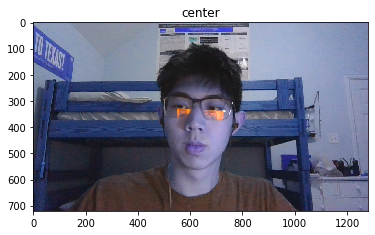

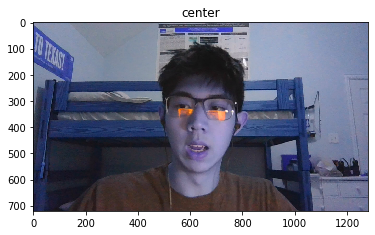

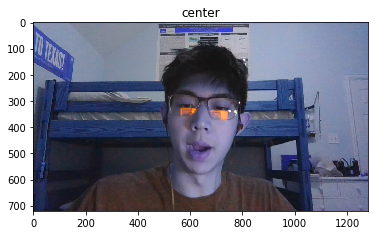

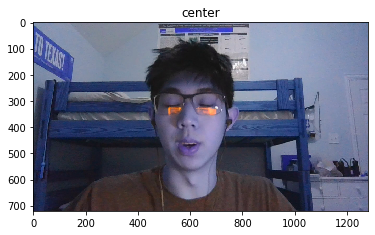

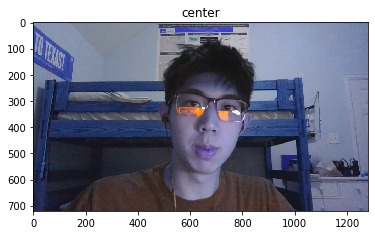

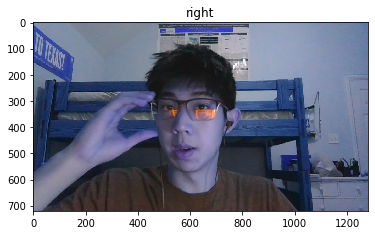

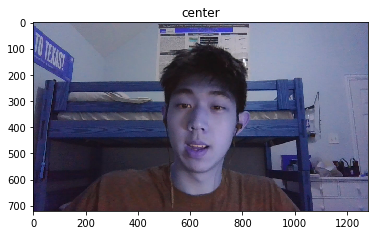

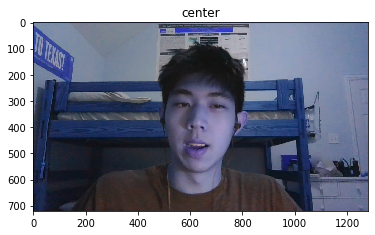

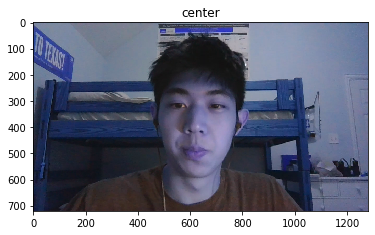

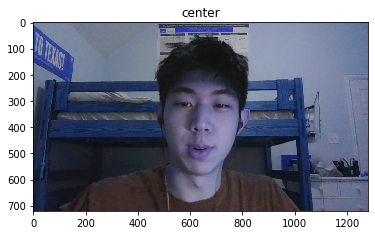

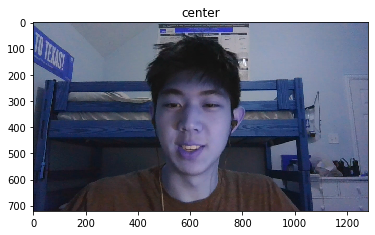

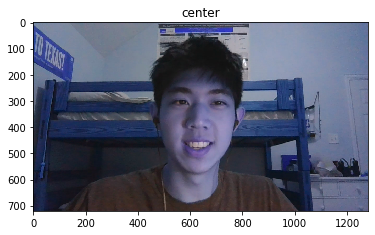

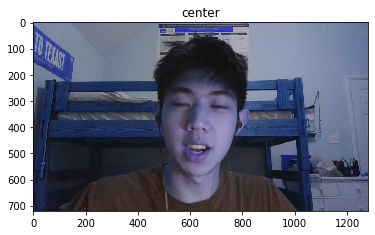

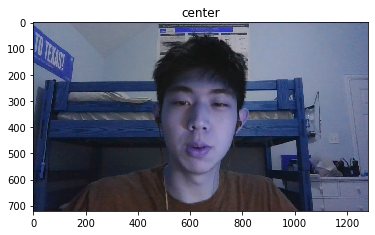

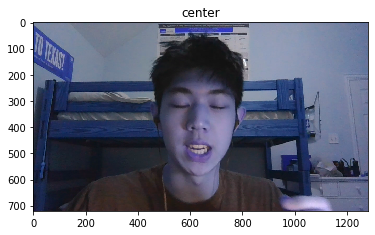

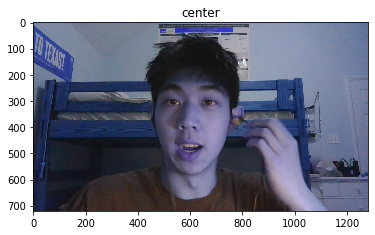

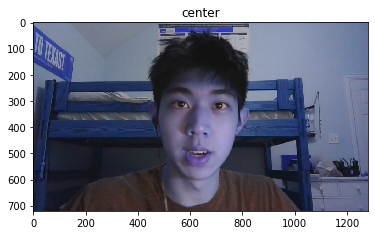

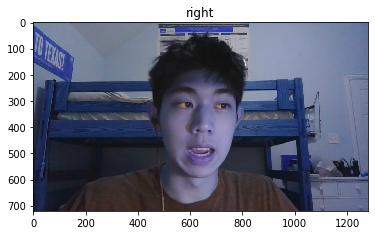

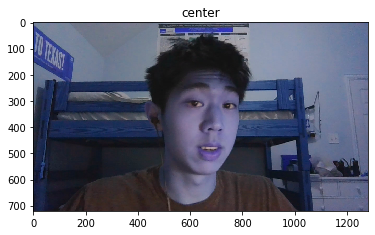

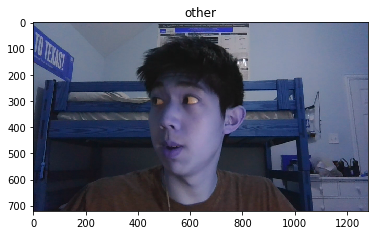

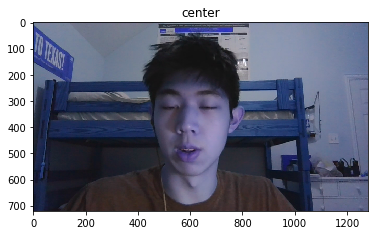

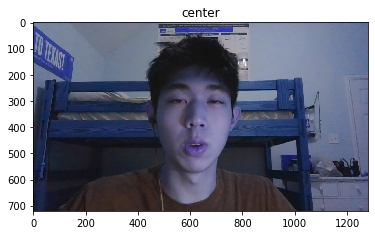

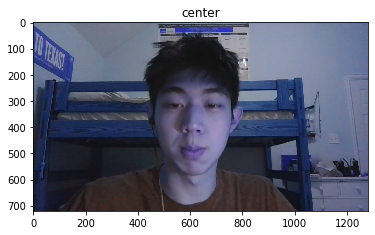

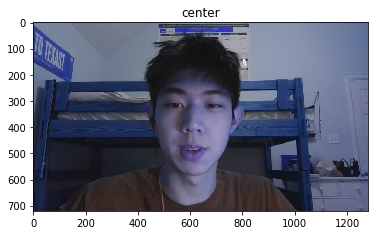

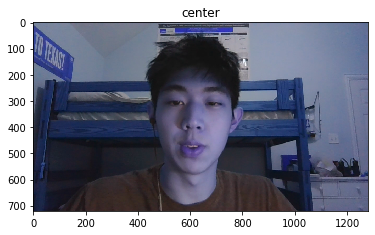

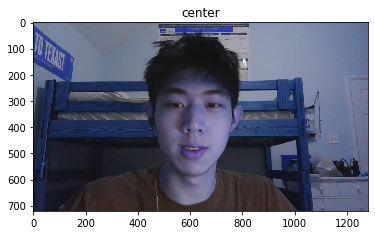

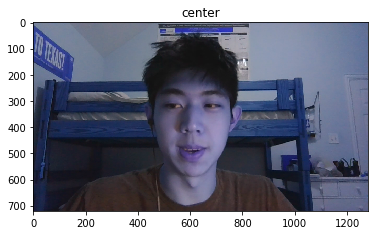

In [60]:
plot(frames)